# Claims Fraud Detection
##  1. Data Examination and Exploratory Analysis

In this step, we will:
1. Load and examine the dataset structure
2. Compute summary statistics
3. Check for missing values and outliers
4. Create visualizations to understand data distributions
5. Analyze relationships between key features

We'll use pandas for data manipulation, numpy for numerical operations, and seaborn/matplotlib for visualizations.

### Columns Preview
Based on the first few lines of the dataset, here are the columns:
- **Month**: Month of the accident
- **WeekOfMonth**: Week of the month when the accident occurred
- **DayOfWeek**: Day of the week of the accident
- **Make**: Vehicle make
- **AccidentArea**: Area type (Urban/Rural)
- **DayOfWeekClaimed**: Day of the week when the claim was made
- **MonthClaimed**: Month when the claim was made
- **WeekOfMonthClaimed**: Week of the month when the claim was made
- **Sex**: Gender of the policy holder
- **MaritalStatus**: Marital status of the policy holder
- **Age**: Age of the policy holder
- **Fault**: Fault status (Policy Holder/Third Party)
- **PolicyType**: Type of policy
- **VehicleCategory**: Category of the vehicle
- **VehiclePrice**: Price range of the vehicle
- **FraudFound_P**: Target variable (1 if fraud, 0 otherwise)
- **PolicyNumber**: Policy number
- **RepNumber**: Report number
- **Deductible**: Deductible amount
- **DriverRating**: Driver's rating
- **Days_Policy_Accident**: Days between policy start and accident
- **Days_Policy_Claim**: Days between policy start and claim
- **PastNumberOfClaims**: Number of past claims
- **AgeOfVehicle**: Age of the vehicle
- **AgeOfPolicyHolder**: Age range of the policy holder
- **PoliceReportFiled**: Whether a police report was filed
- **WitnessPresent**: Whether a witness was present
- **AgentType**: Type of agent handling the claim
- **NumberOfSuppliments**: Number of supplementary claims
- **AddressChange_Claim**: Time since last address change
- **NumberOfCars**: Number of cars insured
- **Year**: Year of the vehicle
- **BasePolicy**: Base policy type

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fraud_oracle.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
df.info()

# Display first few rows
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset Shape: (15420, 33)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null 

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### 1.1. Missing Values Analysis
Let's check for missing values in our dataset and visualize their distribution if any exist. This is crucial for understanding data quality and deciding on appropriate preprocessing steps.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Create a summary of missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

# Display only columns with missing values (if any)
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
if len(missing_summary) > 0:
    print("Columns with missing values:")
    display(missing_summary)
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


### 1.2. Summary Statistics and Distribution Analysis
Let's analyze the distribution of key features and their summary statistics. We'll focus on:
1. Numerical features distribution
2. Categorical features distribution
3. Target variable (FraudFound_P) distribution
4. Key relationships between features

Summary Statistics for Numerical Features:


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


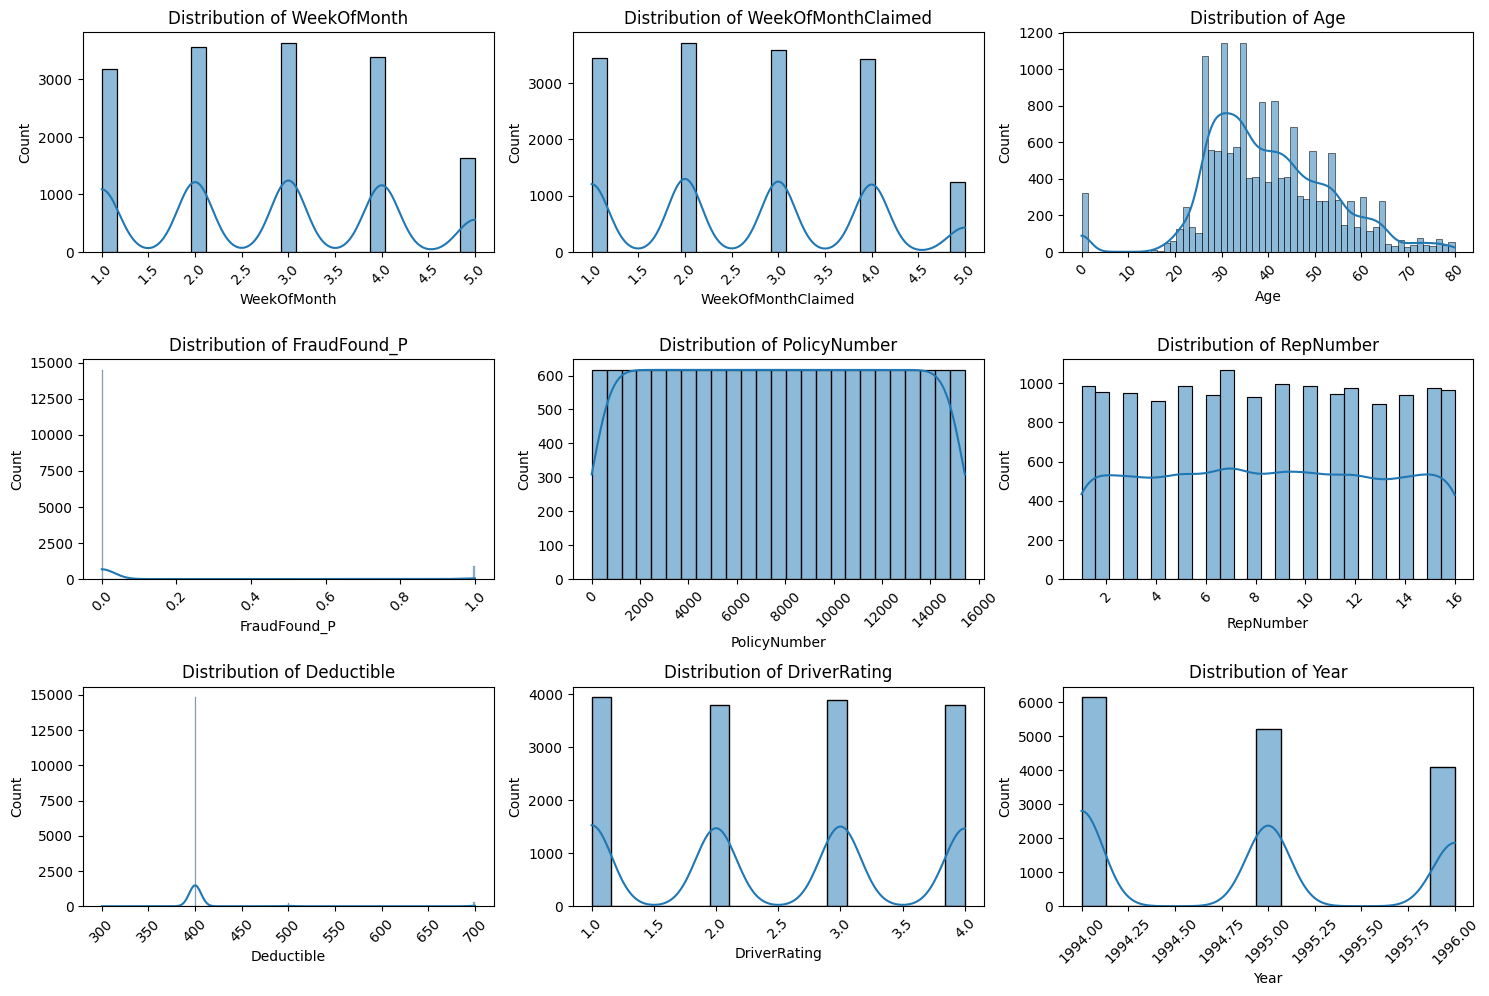


Value Counts for Categorical Features:

Month:


Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Name: count, dtype: int64


DayOfWeek:


DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Name: count, dtype: int64


Make:


Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Name: count, dtype: int64


AccidentArea:


AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64


DayOfWeekClaimed:


DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Name: count, dtype: int64


MonthClaimed:


MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Name: count, dtype: int64


Sex:


Sex
Male      13000
Female     2420
Name: count, dtype: int64


MaritalStatus:


MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64


Fault:


Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64


PolicyType:


PolicyType
Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Name: count, dtype: int64


VehicleCategory:


VehicleCategory
Sedan      9671
Sport      5358
Utility     391
Name: count, dtype: int64


VehiclePrice:


VehiclePrice
20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
Name: count, dtype: int64


Days_Policy_Accident:


Days_Policy_Accident
more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: count, dtype: int64


Days_Policy_Claim:


Days_Policy_Claim
more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: count, dtype: int64


PastNumberOfClaims:


PastNumberOfClaims
2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: count, dtype: int64


AgeOfVehicle:


AgeOfVehicle
7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
Name: count, dtype: int64


AgeOfPolicyHolder:


AgeOfPolicyHolder
31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
Name: count, dtype: int64


PoliceReportFiled:


PoliceReportFiled
No     14992
Yes      428
Name: count, dtype: int64


WitnessPresent:


WitnessPresent
No     15333
Yes       87
Name: count, dtype: int64


AgentType:


AgentType
External    15179
Internal      241
Name: count, dtype: int64


NumberOfSuppliments:


NumberOfSuppliments
none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: count, dtype: int64


AddressChange_Claim:


AddressChange_Claim
no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: count, dtype: int64


NumberOfCars:


NumberOfCars
1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
Name: count, dtype: int64


BasePolicy:


BasePolicy
Collision     5962
Liability     5009
All Perils    4449
Name: count, dtype: int64

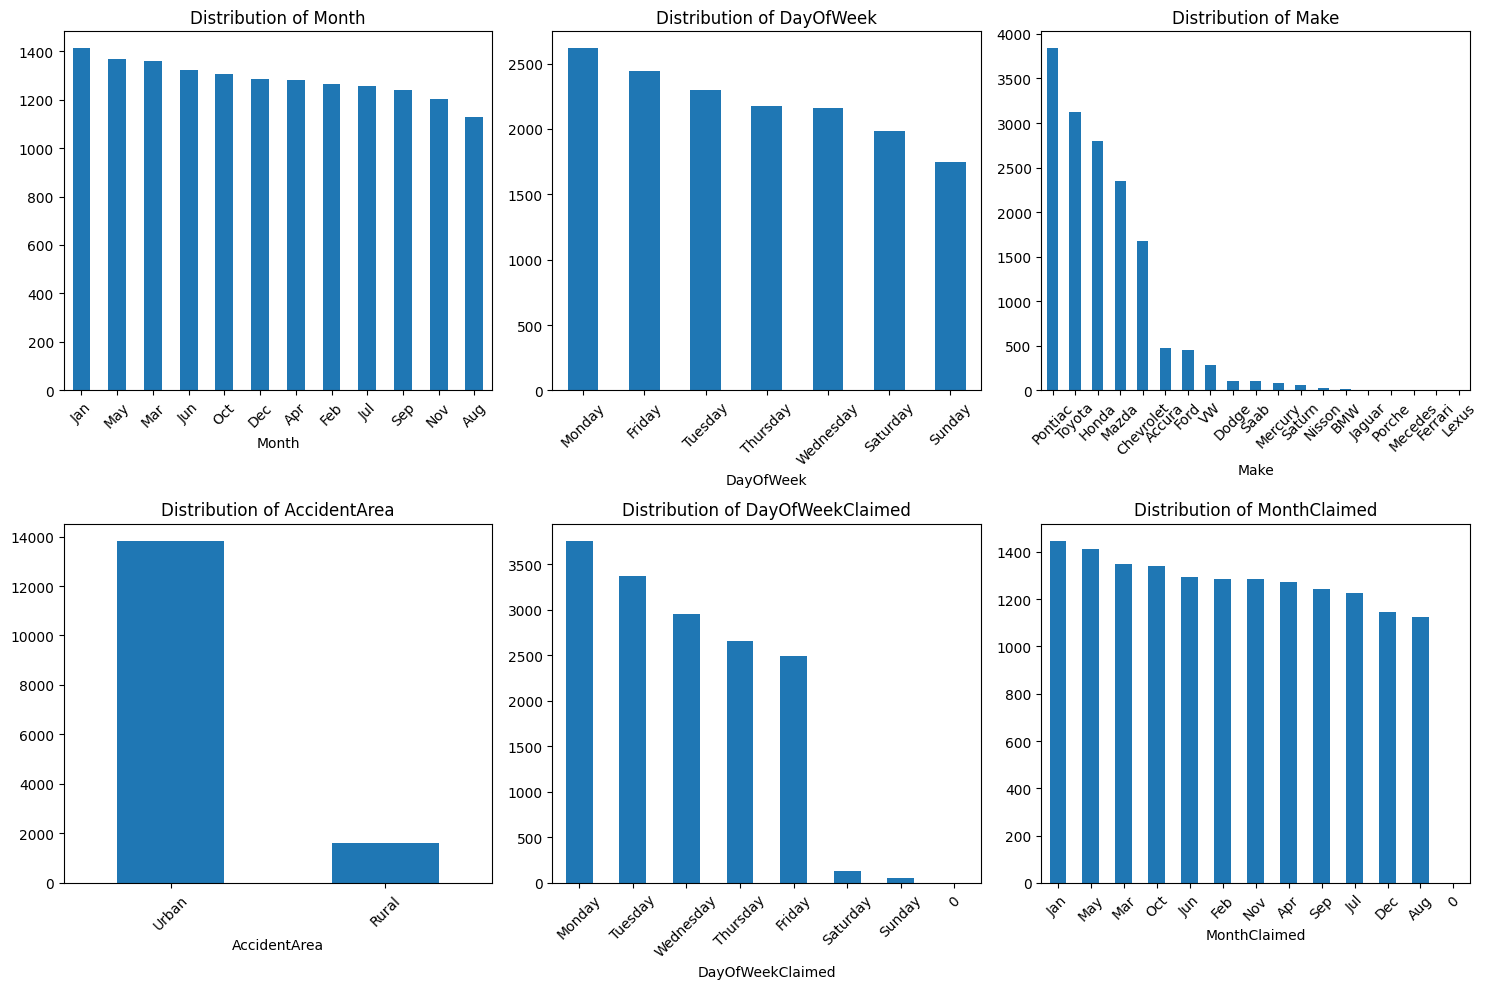

In [3]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Features:")
display(df[numerical_cols].describe())

# Create a figure for numerical features distribution
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display value counts for categorical columns
print("\nValue Counts for Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}:")
    display(df[col].value_counts().head())

# Create bar plots for categorical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols[:6]):  # Plot first 6 categorical features
    if idx < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 1.3. Fraud Analysis
Let's analyze the distribution of fraudulent claims and their relationship with other features. This will help us understand:
1. The class imbalance in our target variable
2. Which features might be more indicative of fraud
3. Patterns in fraudulent claims

#### 1.3.1. Comprehensive Categorical Feature Analysis

Let's analyze all categorical features to understand their relationship with fraud. This analysis will:
1. Calculate fraud rates for each category within each feature
2. Identify the most discriminative features (those with the largest difference in fraud rates)
3. Visualize the relationships between top discriminative features and fraud
4. Help us understand which categorical features are most important for fraud detection


We'll calculate each feature's **Discriminative Power**, which measures how well it can distinguish between fraudulent and non-fraudulent claims.

**Discriminative Power** is calculated as:
- Maximum fraud rate - Minimum fraud rate across all categories within a feature
- Ranges from 0.0 to 1.0 (or 0% to 100%)
- Higher values mean the feature is better at distinguishing fraud:
  - 0.0: All categories have the same fraud rate (not discriminative)
  - 1.0: Perfect discrimination (one category has 100% fraud, another has 0%)

For example, if for "VehicleCategory":
- Sports cars: 15% fraud rate
- Sedans: 5% fraud rate
- SUVs: 3% fraud rate
Then its discriminative power is: 15% - 3% = 12% (0.12)

This analysis will help us:
1. Identify which features best separate fraudulent from non-fraudulent claims
2. Understand the fraud rate patterns within each feature
3. Focus on the most useful features for fraud detection
4. Higher discriminative power suggests the feature could be more important in a predictive model

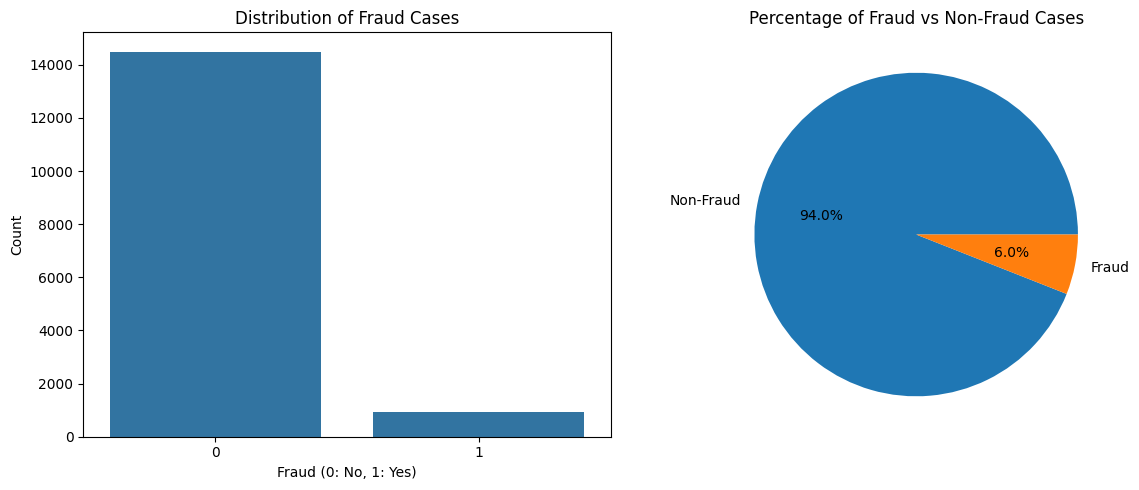


Fraud Distribution:


,Count,Percentage
FraudFound_P,,
0,14497,94.01
1,923,5.99


Analyzing all categorical features: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']

Fraud Rate by Categorical Features:

Month (fraud rate range: 0.037):


,Fraud Rate,Count
Month,,
Mar,0.075000,1360
Aug,0.074534,1127
May,0.068764,1367
Feb,0.064771,1266
Apr,0.062500,1280
Jan,0.061658,1411
Sep,0.061290,1240
Jun,0.060560,1321
Oct,0.053640,1305



DayOfWeek (fraud rate range: 0.018):


,Fraud Rate,Count
DayOfWeek,,
Sunday,0.069914,1745
Saturday,0.066599,1982
Friday,0.062986,2445
Monday,0.061162,2616
Thursday,0.055223,2173
Wednesday,0.053265,2159
Tuesday,0.052174,2300



Make (fraud rate range: 0.250):


,Fraud Rate,Count
Make,,
Mecedes,0.250000,4
Accura,0.125000,472
Saturn,0.103448,58
Saab,0.101852,108
Ford,0.073333,450
Mercury,0.072289,83
BMW,0.066667,15
Honda,0.063906,2801
Toyota,0.059596,3121



AccidentArea (fraud rate range: 0.026):


,Fraud Rate,Count
AccidentArea,,
Rural,0.083229,1598
Urban,0.057155,13822



DayOfWeekClaimed (fraud rate range: 0.079):


,Fraud Rate,Count
DayOfWeekClaimed,,
Saturday,0.078740,127
Friday,0.065679,2497
Wednesday,0.063707,2951
Tuesday,0.058667,3375
Sunday,0.057692,52
Monday,0.057493,3757
Thursday,0.054135,2660
0,0.000000,1



MonthClaimed (fraud rate range: 0.082):


,Fraud Rate,Count
MonthClaimed,,
Aug,0.081705,1126
May,0.072289,1411
Mar,0.071958,1348
Apr,0.064516,1271
Jan,0.063624,1446
Sep,0.062802,1242
Feb,0.060606,1287
Jun,0.060325,1293
Oct,0.054518,1339



Sex (fraud rate range: 0.020):


,Fraud Rate,Count
Sex,,
Male,0.062923,13000
Female,0.043388,2420



MaritalStatus (fraud rate range: 0.046):


,Fraud Rate,Count
MaritalStatus,,
Widow,0.085714,35
Married,0.060141,10625
Single,0.059351,4684
Divorced,0.039474,76



Fault (fraud rate range: 0.070):


,Fraud Rate,Count
Fault,,
Policy Holder,0.078896,11230
Third Party,0.008831,4190



PolicyType (fraud rate range: 0.138):


,Fraud Rate,Count
PolicyType,,
Sport - Collision,0.137931,348
Utility - All Perils,0.120588,340
Sedan - All Perils,0.100563,4087
Utility - Collision,0.100000,30
Sedan - Collision,0.068768,5584
Sedan - Liability,0.007219,4987
Sport - All Perils,0.000000,22
Sport - Liability,0.000000,1
Utility - Liability,0.000000,21



VehicleCategory (fraud rate range: 0.097):


,Fraud Rate,Count
VehicleCategory,,
Utility,0.112532,391
Sedan,0.082205,9671
Sport,0.015677,5358



VehiclePrice (fraud rate range: 0.048):


,Fraud Rate,Count
VehiclePrice,,
less than 20000,0.093978,1096
more than 69000,0.087338,2164
40000 to 59000,0.067245,461
20000 to 29000,0.052110,8079
30000 to 39000,0.049533,3533
60000 to 69000,0.045977,87



Days_Policy_Accident (fraud rate range: 0.104):


,Fraud Rate,Count
Days_Policy_Accident,,
none,0.163636,55
8 to 15,0.090909,55
1 to 7,0.071429,14
15 to 30,0.061224,49
more than 30,0.059356,15247



Days_Policy_Claim (fraud rate range: 0.143):


,Fraud Rate,Count
Days_Policy_Claim,,
8 to 15,0.142857,21
15 to 30,0.107143,56
more than 30,0.059575,15342
none,0.000000,1



PastNumberOfClaims (fraud rate range: 0.044):


,Fraud Rate,Count
PastNumberOfClaims,,
none,0.077895,4352
1,0.062133,3573
2 to 4,0.053601,5485
more than 4,0.033831,2010



AgeOfVehicle (fraud rate range: 0.051):


,Fraud Rate,Count
AgeOfVehicle,,
4 years,0.091703,229
new,0.085791,373
3 years,0.085526,152
5 years,0.070007,1357
6 years,0.066125,3448
7 years,0.055967,5807
more than 7,0.051746,3981
2 years,0.041096,73



AgeOfPolicyHolder (fraud rate range: 0.098):


,Fraud Rate,Count
AgeOfPolicyHolder,,
21 to 25,0.148148,108
18 to 20,0.133333,15
16 to 17,0.096875,320
31 to 35,0.064366,5593
over 65,0.059055,508
36 to 40,0.058620,4043
26 to 30,0.053834,613
41 to 50,0.050919,2828
51 to 65,0.050287,1392



PoliceReportFiled (fraud rate range: 0.023):


,Fraud Rate,Count
PoliceReportFiled,,
No,0.060499,14992
Yes,0.037383,428



WitnessPresent (fraud rate range: 0.026):


,Fraud Rate,Count
WitnessPresent,,
No,0.060001,15333
Yes,0.034483,87



AgentType (fraud rate range: 0.044):


,Fraud Rate,Count
AgentType,,
External,0.060544,15179
Internal,0.016598,241



NumberOfSuppliments (fraud rate range: 0.019):


,Fraud Rate,Count
NumberOfSuppliments,,
none,0.066979,7047
1 to 2,0.063881,2489
more than 5,0.050427,3867
3 to 5,0.048091,2017



AddressChange_Claim (fraud rate range: 0.698):


,Fraud Rate,Count
AddressChange_Claim,,
under 6 months,0.750000,4
2 to 3 years,0.175258,291
1 year,0.064706,170
no change,0.057596,14324
4 to 8 years,0.052298,631



NumberOfCars (fraud rate range: 0.078):


,Fraud Rate,Count
NumberOfCars,,
3 to 4,0.077957,372
2 vehicles,0.060649,709
1 vehicle,0.059374,14316
5 to 8,0.047619,21
more than 8,0.000000,2



BasePolicy (fraud rate range: 0.094):


,Fraud Rate,Count
BasePolicy,,
All Perils,0.101596,4449
Collision,0.072962,5962
Liability,0.007187,5009



Features ranked by fraud rate range (most discriminative first):
AddressChange_Claim: 0.698
Make: 0.250
Days_Policy_Claim: 0.143
PolicyType: 0.138
Days_Policy_Accident: 0.104
AgeOfPolicyHolder: 0.098
VehicleCategory: 0.097
BasePolicy: 0.094
MonthClaimed: 0.082
DayOfWeekClaimed: 0.079
NumberOfCars: 0.078
Fault: 0.070
AgeOfVehicle: 0.051
VehiclePrice: 0.048
MaritalStatus: 0.046
PastNumberOfClaims: 0.044
AgentType: 0.044
Month: 0.037
AccidentArea: 0.026
WitnessPresent: 0.026
PoliceReportFiled: 0.023
Sex: 0.020
NumberOfSuppliments: 0.019
DayOfWeek: 0.018


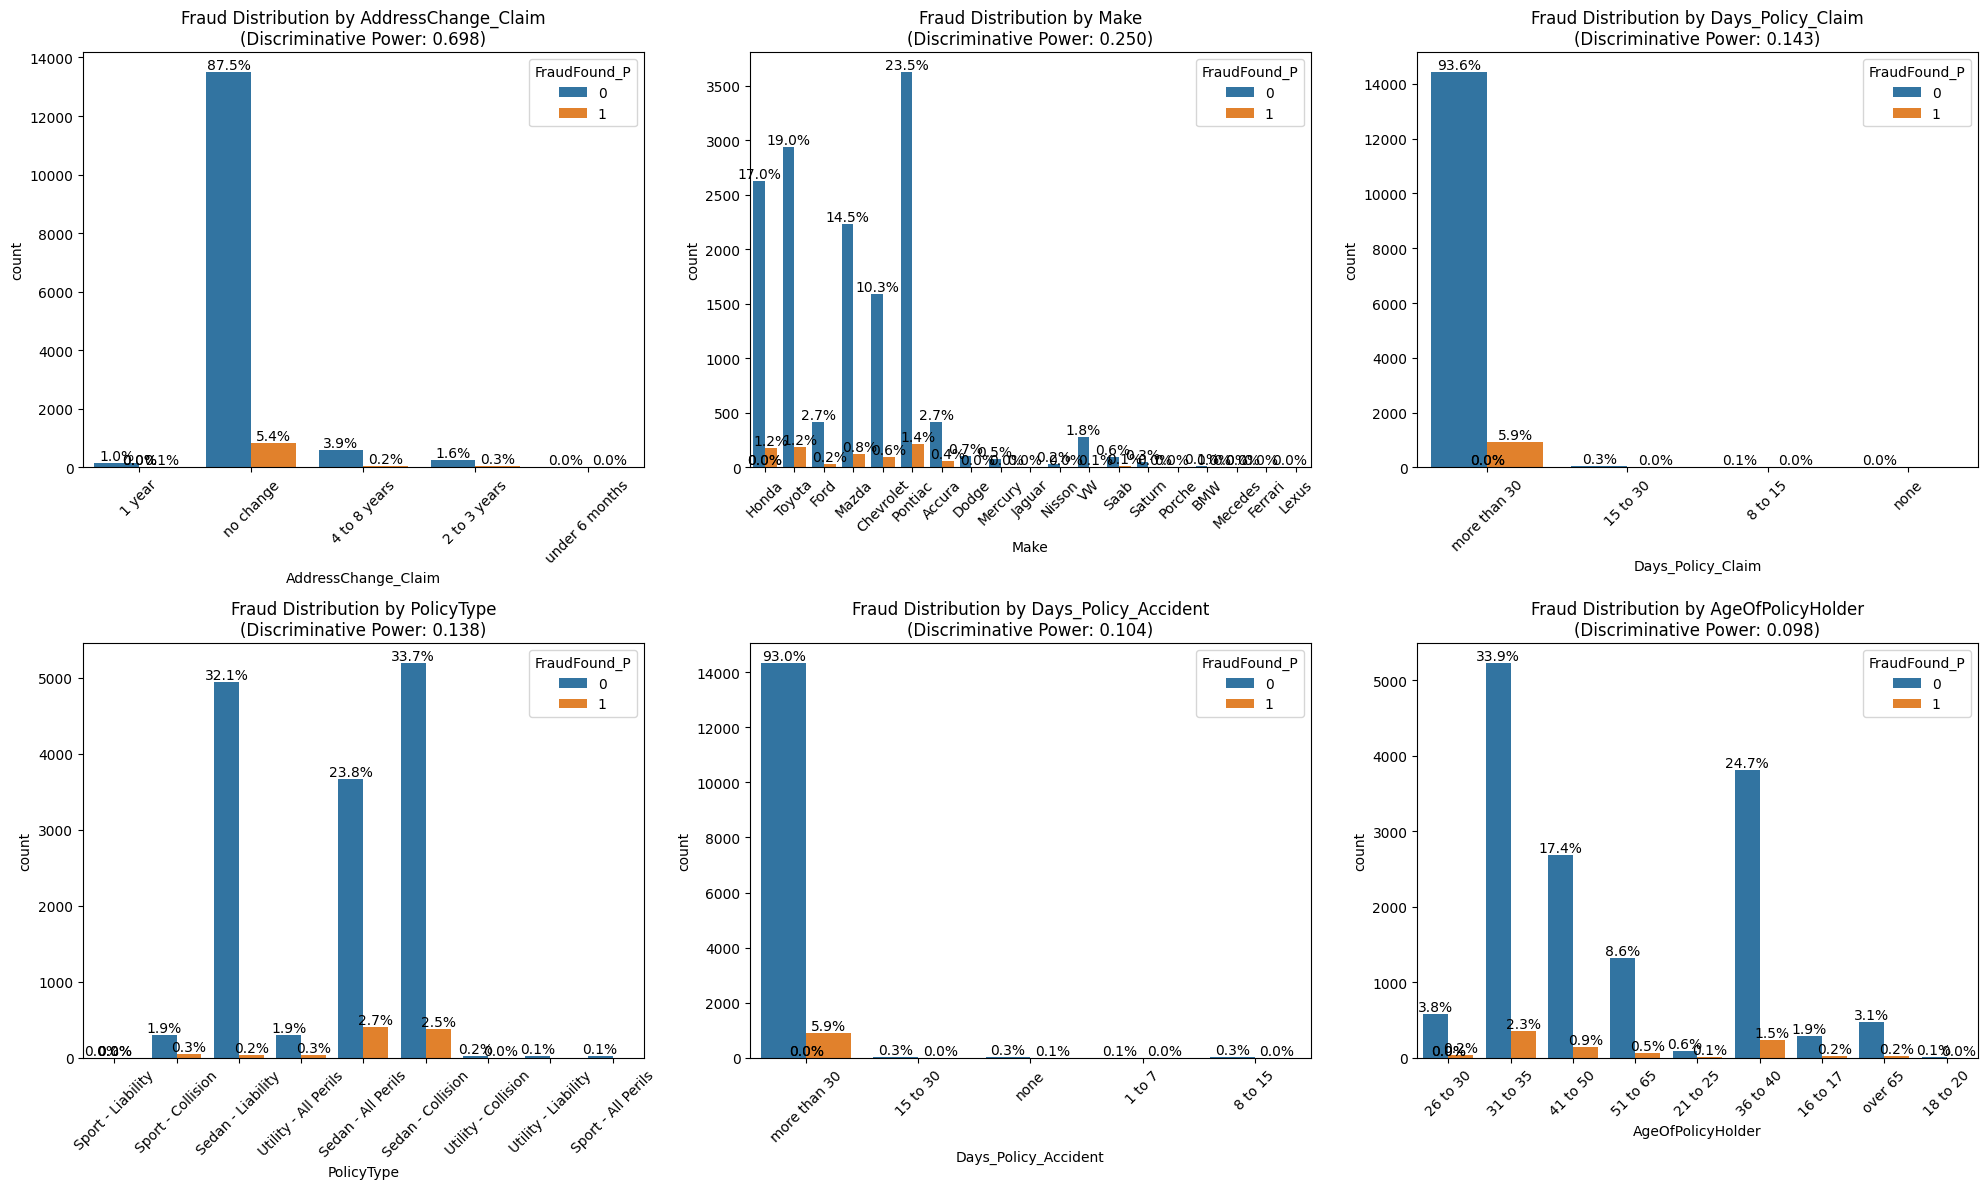


Chi-square test results for categorical features:

Features ranked by chi-square test statistic:


,chi2,p_value
PolicyType,437.401870,1.848256e-89
BasePolicy,402.851921,3.325192e-88
VehicleCategory,290.942140,6.648398e-64
Fault,264.953824,1.428036e-59
AddressChange_Claim,104.733773,9.652105e-22
VehiclePrice,67.768295,2.983598e-13
Make,59.809999,2.195889e-06
PastNumberOfClaims,53.500831,1.433718e-11
MonthClaimed,42.266750,3.003256e-05
AgeOfPolicyHolder,33.003254,6.150520e-05


In [4]:
# Analyze fraud distribution
fraud_dist = df['FraudFound_P'].value_counts()
fraud_percentages = (fraud_dist / len(df)) * 100

# Create a figure for fraud distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
sns.countplot(data=df, x='FraudFound_P', ax=ax1)
ax1.set_title('Distribution of Fraud Cases')
ax1.set_xlabel('Fraud (0: No, 1: Yes)')
ax1.set_ylabel('Count')

# Pie chart
ax2.pie(fraud_percentages, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%')
ax2.set_title('Percentage of Fraud vs Non-Fraud Cases')

plt.tight_layout()
plt.show()

# Display fraud statistics
print("\nFraud Distribution:")
display(pd.DataFrame({
    'Count': fraud_dist,
    'Percentage': fraud_percentages
}).round(2))

# Get all categorical features (excluding the target variable)
categorical_features = [col for col in categorical_cols if col != 'FraudFound_P']

print("Analyzing all categorical features:", categorical_features)

# Calculate fraud rate for all categorical features
print("\nFraud Rate by Categorical Features:")
fraud_rates = {}
for feature in categorical_features:
    # Calculate fraud rate and count for each category
    fraud_rate = df.groupby(feature)['FraudFound_P'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    fraud_rate.columns = ['Fraud Rate', 'Count']
    
    # Calculate the range of fraud rates (max - min) as a measure of feature discriminative power
    fraud_rates[feature] = fraud_rate['Fraud Rate'].max() - fraud_rate['Fraud Rate'].min()
    
    print(f"\n{feature} (fraud rate range: {fraud_rates[feature]:.3f}):")
    display(fraud_rate)

# Sort features by their fraud rate range to identify most discriminative features
most_discriminative = sorted(fraud_rates.items(), key=lambda x: x[1], reverse=True)
print("\nFeatures ranked by fraud rate range (most discriminative first):")
for feature, rate_range in most_discriminative:
    print(f"{feature}: {rate_range:.3f}")

# Create subplots for top 6 most discriminative features
top_features = [feature for feature, _ in most_discriminative[:6]]
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Create countplot
    sns.countplot(data=df, x=feature, hue='FraudFound_P', ax=axes[idx])
    
    # Customize the plot
    axes[idx].set_title(f'Fraud Distribution by {feature}\n(Discriminative Power: {fraud_rates[feature]:.3f})')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add percentage labels on top of bars
    total = len(df[feature])
    for p in axes[idx].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[idx].annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate and display chi-square test results
from scipy.stats import chi2_contingency
print("\nChi-square test results for categorical features:")
chi_square_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['FraudFound_P'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_square_results[feature] = {'chi2': chi2, 'p_value': p_value}

# Display results sorted by chi-square value
chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df = chi_square_df.sort_values('chi2', ascending=False)
print("\nFeatures ranked by chi-square test statistic:")
display(chi_square_df)

The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. In the context of fraud detection, we use the chi-square test to check if there is a relationship between a categorical feature (like `VehicleCategory`, `Make`, etc.) and the target variable (`FraudFound_P`).
##### How it works:
- The test compares the observed frequencies of fraud and non-fraud in each category of a feature to the frequencies we would expect if there were no relationship between the feature and fraud.
- It calculates a chi-square statistic and a p-value:
    - Chi-square statistic: Measures how much the observed counts deviate from the expected counts.
    - P-value: Tells us whether this deviation is statistically significant.
##### Interpreting the results:
- Low p-value (typically < 0.05): There is a statistically significant association between the feature and fraud. This means the feature is likely useful for detecting fraud.
- High p-value (typically > 0.05): No significant association; the feature may not be useful for fraud detection.
#### 1.3.2. Correlation Analysis

Let's examine the relationships between numerical features and their correlation with fraud. This will help us identify:
1. Which features are most strongly correlated with fraud
2. Potential multicollinearity between features
3. Features that might be most useful for fraud detection

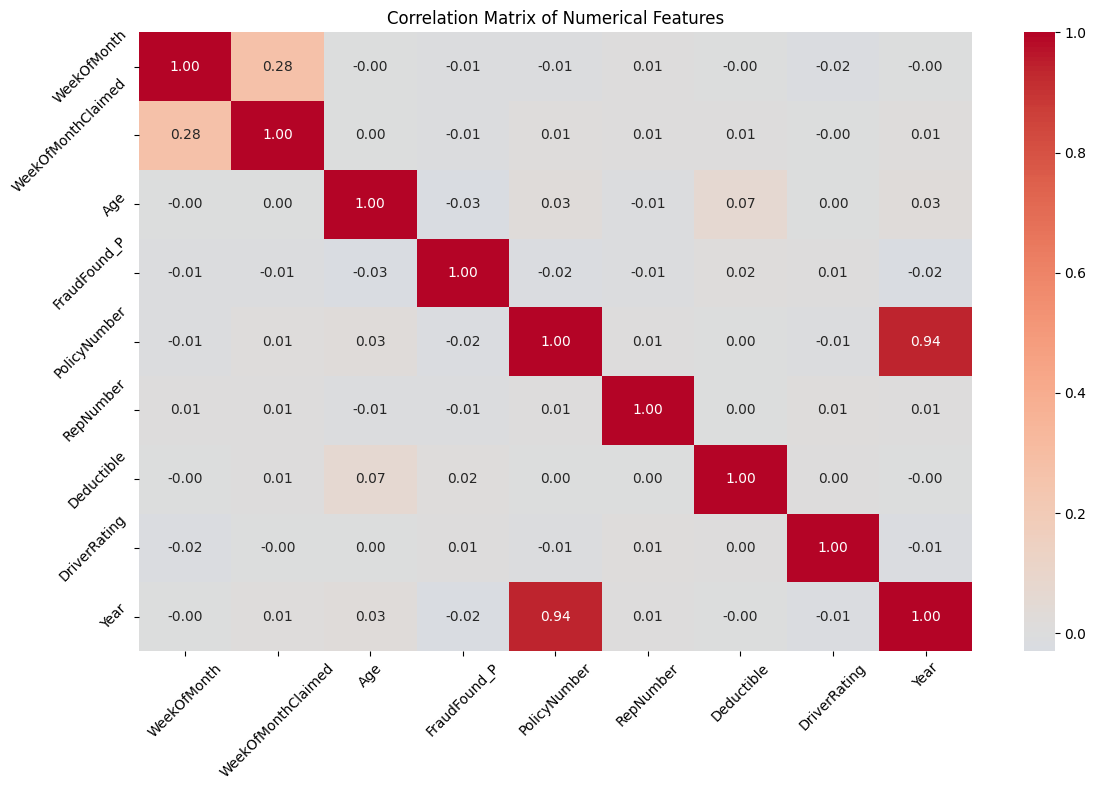


Correlations with Fraud:


FraudFound_P          1.000000
Deductible            0.017348
DriverRating          0.007266
WeekOfMonthClaimed   -0.005761
RepNumber            -0.007551
WeekOfMonth          -0.011861
PolicyNumber         -0.020345
Year                 -0.024760
Age                  -0.029741
Name: FraudFound_P, dtype: float64

In [5]:
# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Display correlations with fraud
fraud_correlations = correlation_matrix['FraudFound_P'].sort_values(ascending=False)
print("\nCorrelations with Fraud:")
display(fraud_correlations)

##### Key Observations:
- `FraudFound_P` (the target variable) has very low correlation with all numerical features (all values are close to 0).
    - This means none of the numerical features have a strong linear relationship with fraud in this dataset.
- `PolicyNumber` and `Year` have a very high correlation (0.94).
    - This suggests that `PolicyNumber` and `Year` are almost redundant (possibly PolicyNumber encodes the year).
- `WeekOfMonth` and `WeekOfMonthClaimed` have a moderate correlation (0.28).
    - This makes sense, as claims are often made in the same week as the accident.
##### What does this mean for modeling?
- Low correlation with `FraudFound_P`: Linear models using only these numerical features may not perform well for fraud detection. We may need to:
    - Use non-linear models (e.g., tree-based models)
    - Engineer new features
    - Rely more on categorical features (as explored with chi-square and discriminative power)
- High correlation between PolicyNumber and Year: We may want to drop one of these features to avoid multicollinearity.

### 1.4. Data Cleaning
In this step, we will clean the data to prepare it for modeling. Our strategy includes:

1. **Handling Class Imbalance**
   - Fraud cases are much less frequent than non-fraud cases.
   - We will use oversampling (SMOTE or RandomOverSampler) to balance the classes.


2. **Outlier Detection and Treatment**
   - Visualize numerical features with boxplots.
   - Remove or cap extreme outliers using the IQR method.
   - Optionally, apply transformations (e.g., log-transform) to skewed features.


3. **Normalization/Standardization**
   - Apply normalization or standardization to numerical features if needed.


4. **Encoding Categorical Features**
   - Convert categorical variables to numeric using one-hot encoding or label encoding.

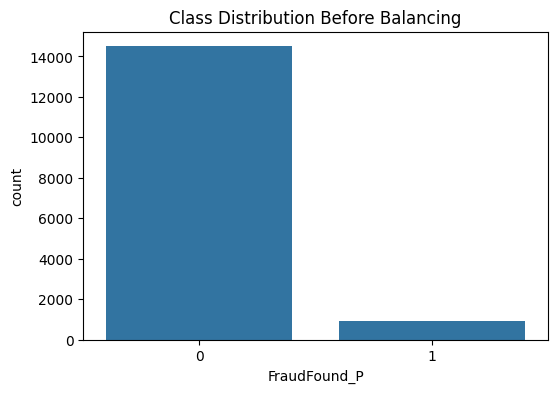

Class distribution after oversampling: Counter({0: 14497, 1: 14497})


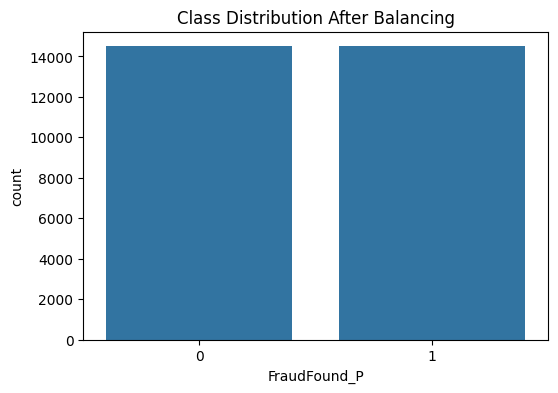

In [6]:
# Visualize class imbalance
from collections import Counter

plt.figure(figsize=(6,4))
sns.countplot(x='FraudFound_P', data=df)
plt.title('Class Distribution Before Balancing')
plt.show()

# Handle class imbalance using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Encode categorical features with label encoding (for demonstration)
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_encoded, y)

print('Class distribution after oversampling:', Counter(y_resampled))

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Balancing')
plt.show()

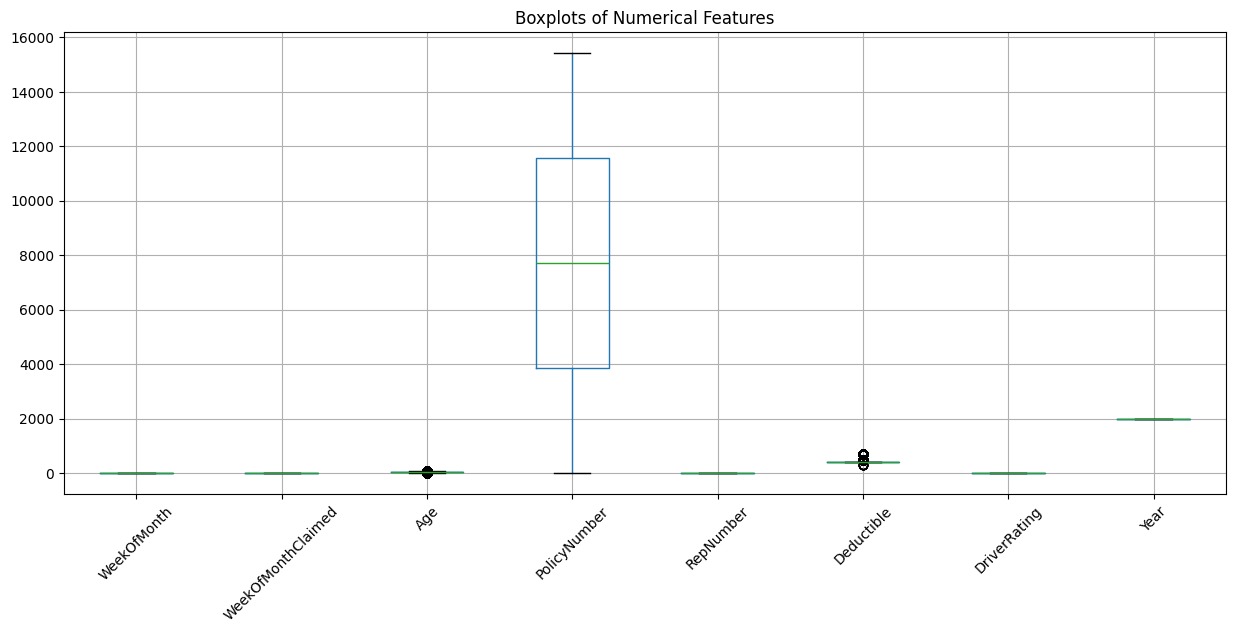

In [7]:
# Visualize outliers in numerical features
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 6))
df[numerical_cols].boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

PolicyNumber is likely just an identifier and not useful for modeling.

In [8]:
# Remove PolicyNumber column
X_resampled = X_resampled.drop('PolicyNumber', axis=1)

We use StandardScaler to standardize features (mean=0, std=1):

In [9]:
# Scale/normalize numerical features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = X_resampled.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
scaler = StandardScaler()
X_resampled[numerical_cols] = scaler.fit_transform(X_resampled[numerical_cols])

print('Numerical features after scaling:')
display(X_resampled[numerical_cols].head())

Numerical features after scaling:


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,-1.023840,1.732675,1.535620,-0.725983,0.374605,0.789722,-0.446401,-1.327965,-2.532479,1.472113,...,-3.210856,-1.242859,-0.153331,-0.067111,-0.105807,0.860364,-5.544015,4.811275,-1.041451,1.627099
1,-0.435985,0.179772,1.535620,-0.725983,0.374605,-0.955757,-0.446401,1.053567,0.394870,1.472113,...,-0.646640,-0.555789,6.521851,-0.067111,-0.105807,0.860364,0.276287,-0.265537,-1.041451,0.262523
2,1.327580,1.732675,-1.400885,-0.725983,0.374605,0.353352,1.012026,-0.534121,0.394870,-0.638790,...,0.208098,0.818351,-0.153331,-0.067111,-0.105807,0.860364,0.276287,-0.265537,-1.041451,0.262523
3,0.151870,-0.596679,-0.422050,1.316975,-2.669480,-1.392127,-0.154716,-1.327965,0.394870,-0.638790,...,1.062837,1.505422,6.521851,-0.067111,-0.105807,-0.030575,0.276287,-0.265537,-1.041451,1.627099
4,-0.435985,1.732675,-0.911467,-0.725983,0.374605,0.789722,-0.738087,-0.534121,-2.532479,1.472113,...,-1.501379,-0.555789,-0.153331,-0.067111,-0.105807,0.860364,0.276287,-0.265537,-1.041451,0.262523


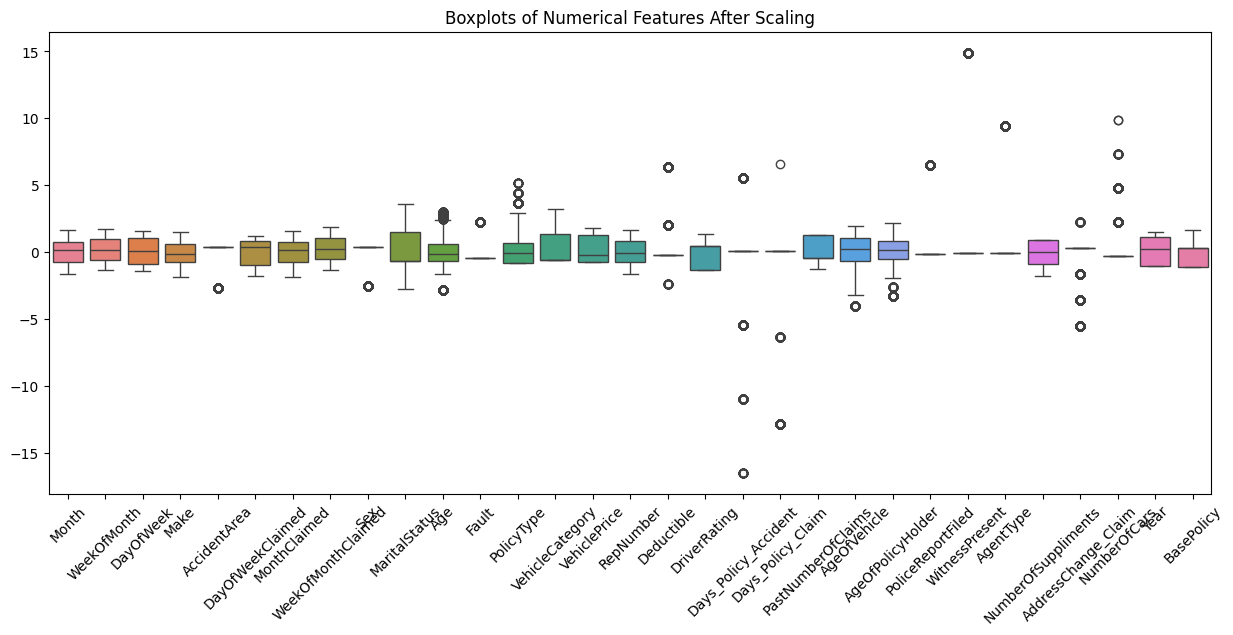

In [10]:
# Boxplots of scaled features
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_resampled[numerical_cols])
plt.title('Boxplots of Numerical Features After Scaling')
plt.xticks(rotation=45)
plt.show()

- All features are now on a similar scale (centered around 0, with most values between -2 and 2), thanks to standardization.
- Outliers are still visible as dots outside the whiskers, but their effect is now less extreme due to scaling.
- No single feature dominates the scale, which is important for many machine learning algorithms.
- Scaling ensures that features contribute equally to distance-based and gradient-based models (like logistic regression, SVM, neural networks).

### 1.5. Feature Engineering
To improve fraud detection, we will engineer new features based on domain knowledge and data patterns:

- **Policy Age**: Time since the policy was issued (using Year or AgeOfPolicyHolder as a proxy). Newer policies with quick claims may be riskier.
- **Address Change Recency**: Time since last address change (from AddressChange_Claim). Recent changes can be associated with fraud.
- **Is Weekend Claim**: Whether the claim was made on a weekend (from DayOfWeekClaimed). Some studies show fraud is more likely to be reported on weekends.

- **AgeRiskCategory**: Groups policy holders by age-related risk

- **RiskScore**: Composite score of various risk factors
- **SuspiciousFlags**: Count of suspicious claim characteristics

In [13]:
# Policy Age (using Year as proxy for policy start year)
current_year = X_resampled['Year'].max()
X_resampled['PolicyAge'] = current_year - X_resampled['Year']

# Address Change Recency (convert to numeric)
address_map = {
    'no change': 0,
    'under 6 months': 0.5,
    '1 year': 1,
    '2 to 3 years': 2.5,
    '4 to 8 years': 6,
    'over 8 years': 10
}
if 'AddressChange_Claim' in X_resampled.columns:
    X_resampled['AddressChangeRecency'] = X_resampled['AddressChange_Claim'].map(address_map).fillna(0)

# Is Weekend Claim
weekend_days = ['Saturday', 'Sunday']
if 'DayOfWeekClaimed' in X_resampled.columns:
    X_resampled['IsWeekendClaim'] = X_resampled['DayOfWeekClaimed'].apply(lambda x: 1 if x in weekend_days else 0)

# Age Risk Category
X_resampled['AgeRiskCategory'] = X_resampled['AgeOfPolicyHolder'].apply(
    lambda x: '2' if any(age in str(x) for age in ['16 to 17', '21 to 25']) 
    else ('1' if any(age in str(x) for age in ['26 to 30', '31 to 35']) 
    else '0')
)

# Suspicious Claim Indicators
X_resampled['SuspiciousFlags'] = X_resampled.apply(
    lambda row: sum([
        1 if row['AddressChange_Claim'] == 'under 6 months' else 0,
        1 if row['NumberOfSuppliments'] != 'none' else 0,
        1 if row['WitnessPresent'] == 'No' and row['PoliceReportFiled'] == 'No' else 0
    ]),
    axis=1
)

# Show sample outputs
display(X_resampled[['PolicyAge', 'AddressChangeRecency', 'IsWeekendClaim', 'AgeRiskCategory',
                      'SuspiciousFlags']].head())

,PolicyAge,AddressChangeRecency,IsWeekendClaim,AgeRiskCategory,SuspiciousFlags
0,2.501311,0.0,0,0,1
1,2.501311,0.0,0,0,1
2,2.501311,0.0,0,0,1
3,2.501311,0.0,0,0,1
4,2.501311,0.0,0,0,1


In [14]:
# Identify categorical columns (object or string type)
categorical_cols = X_resampled.select_dtypes(include=['object']).columns
print('Categorical columns to encode:', list(categorical_cols))

# Apply one-hot encoding
df_encoded = pd.get_dummies(X_resampled, columns=categorical_cols, drop_first=True)

print('Shape after encoding:', df_encoded.shape)
display(df_encoded.head())

# Use df_encoded for modeling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

Categorical columns to encode: ['AgeRiskCategory']
Shape after encoding: (28994, 35)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,PolicyAge,AddressChangeRecency,IsWeekendClaim,SuspiciousFlags
0,-1.023840,1.732675,1.535620,-0.725983,0.374605,0.789722,-0.446401,-1.327965,-2.532479,1.472113,...,-0.105807,0.860364,-5.544015,4.811275,-1.041451,1.627099,2.501311,0.0,0,1
1,-0.435985,0.179772,1.535620,-0.725983,0.374605,-0.955757,-0.446401,1.053567,0.394870,1.472113,...,-0.105807,0.860364,0.276287,-0.265537,-1.041451,0.262523,2.501311,0.0,0,1
2,1.327580,1.732675,-1.400885,-0.725983,0.374605,0.353352,1.012026,-0.534121,0.394870,-0.638790,...,-0.105807,0.860364,0.276287,-0.265537,-1.041451,0.262523,2.501311,0.0,0,1
3,0.151870,-0.596679,-0.422050,1.316975,-2.669480,-1.392127,-0.154716,-1.327965,0.394870,-0.638790,...,-0.105807,-0.030575,0.276287,-0.265537,-1.041451,1.627099,2.501311,0.0,0,1
4,-0.435985,1.732675,-0.911467,-0.725983,0.374605,0.789722,-0.738087,-0.534121,-2.532479,1.472113,...,-0.105807,0.860364,0.276287,-0.265537,-1.041451,0.262523,2.501311,0.0,0,1


### 1.6. Model Development & Evaluation
We will build and evaluate baseline fraud detection models using scikit-learn. The workflow includes:

1. **Data Split**: Split the cleaned and engineered dataset into training and testing sets.
2. **Baseline Model**: Train a Logistic Regression model as a baseline.
3. **Tree-Based Model**: Train a Random Forest model for comparison.
4. **Evaluation Metrics**: Assess models using accuracy, precision, recall, F1-score, and ROC-AUC.
5. **Visualizations**: Generate confusion matrices and ROC curves to compare model performance.
6. **Documentation**: Record model parameters, evaluation results, and discuss challenges and improvement areas.

This approach provides a solid foundation for iterative model improvement and selection.

Train shape: (23195, 36), Test shape: (5799, 36)
Logistic Regression Results:
Accuracy: 0.7392653905845835
Precision: 0.6816871888917998
Recall: 0.8975508796136599
F1-score: 0.7748659916617034
ROC-AUC: 0.7965700419883195


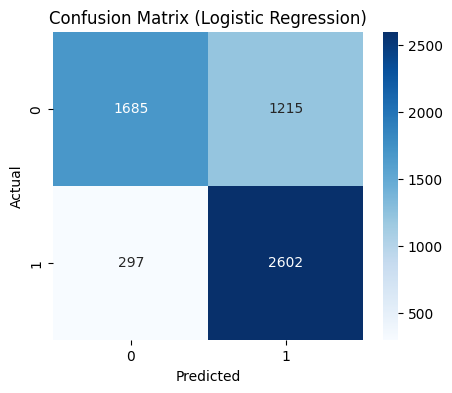

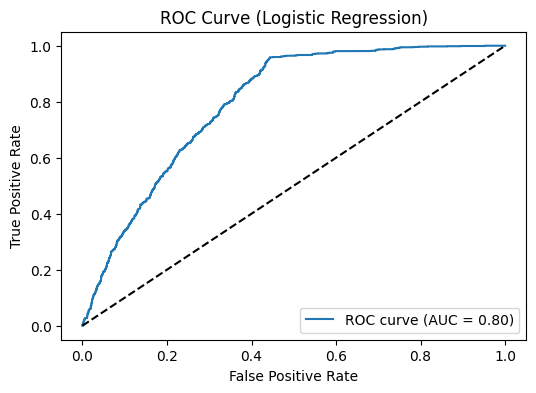

In [15]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Baseline Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()

Random Forest Results:
Accuracy: 0.9991377823762718
Precision: 0.9982782369146006
Recall: 1.0
F1-score: 0.999138376701706
ROC-AUC: 1.0


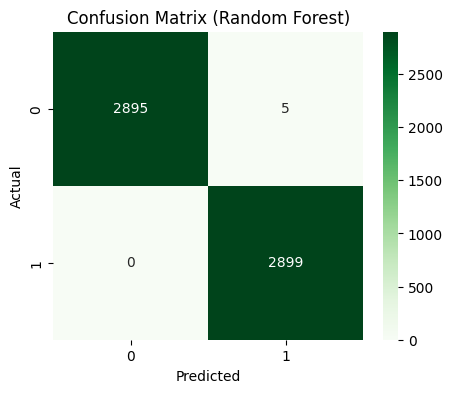

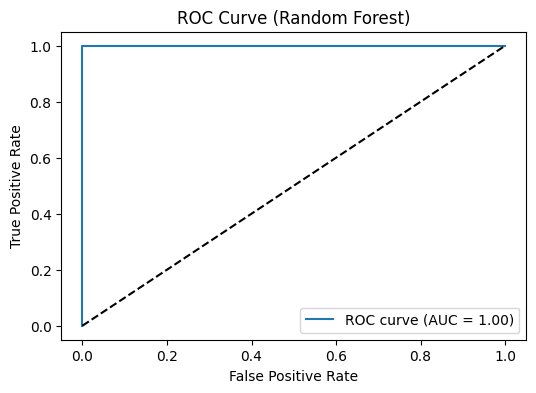

In [16]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()